### 一.原理
HBOS(Histogram-based Outlier Score)算法，即基于直方图的异常点检测算法，笔者在最近的工作中恰好有用到该算法，实践中的表现效果很nice，它的原理简单来说就是就是将数据各维度的直方图概率相加，整体概率值越小的样本，它是异常点的可能性就越高，衡量指标定义如下：   

$$
HBOS(p)=\sum_{i=1}^dlog(\frac{1}{hist_i(p)})
$$  

这里，$hist_i(p)$表示样本$p$在第$i$维特征上的直方图概率，借助于numpy，我们可以轻易实现该算法

### 二.代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#造伪数据
from sklearn.datasets import make_classification
X, _ = make_classification(n_samples=5000, n_features=2,
                           n_informative=2,n_redundant=0,
                           n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

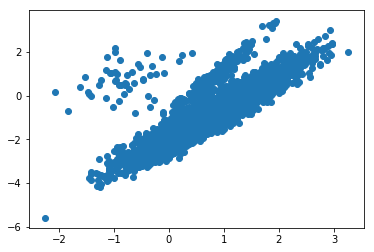

In [3]:
plt.scatter(x=X[:,0],y=X[:,1])

In [4]:
#计算直方图概率
hist_X=np.zeros_like(X)
for i in range(0,X.shape[1]):
    hist,bins=np.histogram(X[:,i])
    hist=hist/hist.sum()
    hist_X[:,i]=np.asarray([hist[idx-1] for idx in np.digitize(X[:,i],bins[:-1])])

In [5]:
hist_X

array([[0.3086, 0.3084],
       [0.0888, 0.1024],
       [0.2284, 0.3084],
       ...,
       [0.3086, 0.3084],
       [0.2284, 0.3084],
       [0.1058, 0.0804]])

In [6]:
#计算HBOS异常值
hbos=np.zeros_like(hist_X[:,0])
for i in range(0,hist_X.shape[1]):
    hbos+=np.log(1.0/(hist_X[:,i]+1e-7))

In [7]:
hbos

array([2.35206633, 4.70023509, 2.65301368, ..., 2.35206633, 2.65301368,
       4.76694367])

In [8]:
#定义异常阈值
thresh=0.01#前1%
thresh_value=sorted(hbos)[int(len(hbos)*(1-thresh))]

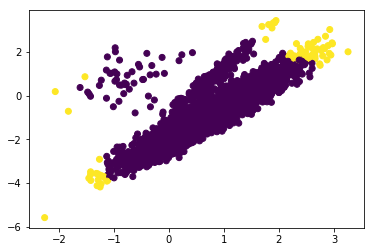

In [9]:
#查看异常值
plt.scatter(x=X[:,0],y=X[:,1],c=hbos>=thresh_value)

代码封装到ml_models.outlier_detect包中...